In [225]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [226]:
import numpy as np
import matplotlib.pyplot as plt
%aimport Prebreakdown
import Util
from scipy.special import j0, jn_zeros

In [227]:
r_max = 2e-3; z_max = 1e-3

V_bottom = Util.bessel_boundary(-500,1e-3)
V_top = Util.bessel_boundary(500,1e-3)
n_bottom = Util.gaussian_boundary(1e19,1e-4 / (np.sqrt(2*np.log(2)))) #HWHM of 1e-4

In [228]:
N_z = 100; N_r = 100
Dz = z_max / N_z; Dr = r_max / N_r

In [229]:
Dz

1e-05

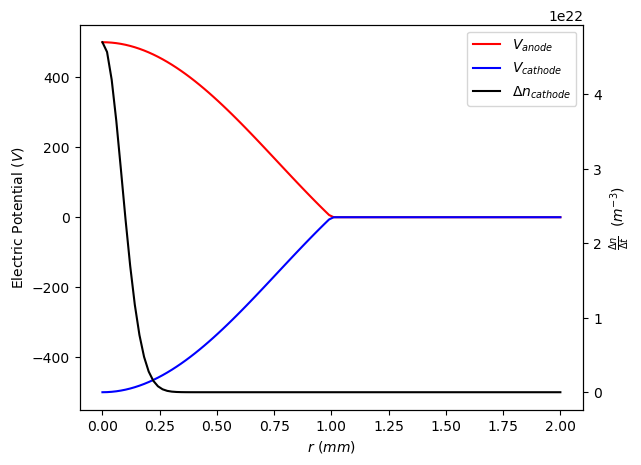

In [230]:
r = np.linspace(0,r_max,N_r)

fig, ax1 = plt.subplots(figsize=(6.5,5))

ax2 = ax1.twinx()

line1, = ax1.plot(r*1e3, np.array([V_top(r_i,0) for r_i in r]), color='red', label=r'$V_{anode}$')
line2, = ax1.plot(r*1e3, np.array([V_bottom(r_i,0) for r_i in r]), color='blue',label=r'$V_{cathode}$')
line3, = ax2.plot(r*1e3, np.array([n_bottom(r_i,0) for r_i in r]), color='black',label=r'$\Delta n_{cathode}$')

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

ax1.legend([line1,line2,line3],[r'$V_{anode}$',r'$V_{cathode}$',r'$\Delta n_{cathode}$'],fontsize=10)

ax1.set_ylabel(r'Electric Potential $(V)$',fontsize=10)
ax2.set_ylabel(r'$\frac{\Delta n}{\Delta t}$  $(m^{-3})$',fontsize=10)
ax1.set_xlabel(r'$r$ $(mm)$',fontsize=10)

fig.savefig('Boundary_Conditions.jpg')

In [231]:
p = Prebreakdown.Prebreakdown(N_z,N_r,Dz,Dr,dt=1e-16,V_top=V_top,V_bottom=V_bottom,nu=1e10,
                              n_bottom=n_bottom,u_z_bottom=lambda r,t : 1e5,
                              save_dir='100x100_1e-4')

In [232]:
p.n

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [233]:
p.sor(sp_r=0.97,iterations=1000000,EPS=1e-13)

Error reduced by factor of 1e-13 in 5606 iterations and anorm = 7.321671803561802e-09


True

In [240]:
for _ in range(1000):
    p.step(method='Fluid',smooth=True,smooth_sigma=1/2,save_every=1,substeps=2,resolve_pot_every=1)

Resolving potential!
Error reduced by factor of 0.0001531579260183717 in <built-in function iter> iterations
target_dt: 1.0652941287274358e-13
Old dt: 1.0674600329746878e-13, ratio: 0.9979709739190739
Time step limited to: 1.0663765309585213e-13 at time: 1.3304716321226583e-10
[**] Saving in 100x100_1e-4/time_1.3315369315000378e-10_s
Step took: 32.02290916442871
Resolving potential!
Error reduced by factor of 0.000637182871591807 in <built-in function iter> iterations
target_dt: 1.0631594402922297e-13
Old dt: 1.0652993773794061e-13, ratio: 0.9979912340769028
Time step limited to: 1.0642288709663679e-13 at time: 1.3326011603710042e-10
[**] Saving in 100x100_1e-4/time_1.3336643257435134e-10_s
Step took: 32.49952268600464
Resolving potential!
Error reduced by factor of 0.0006468448069173637 in <built-in function iter> iterations
target_dt: 1.0610540231374285e-13
Old dt: 1.0631653725092642e-13, ratio: 0.9980140912915058
Time step limited to: 1.0621091731838859e-13 at time: 1.33472643491669

KeyboardInterrupt: 

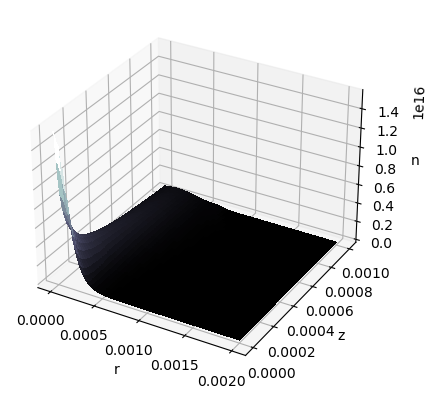

In [241]:
p.n_surface_plot()

0